<a href="https://colab.research.google.com/github/nurmuhimawann/C22-098-Fruity-Website/blob/ml-development/notebook/itsfruity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Tim Capstone C22-098**
## **Proyek Capstone : Fruity (Fruit Quality Control): Sistem Klasifikasi Buah Berbasis Website sebagai Kontrol Kualitas Buah Segar**

---

Link drive dataset:
https://drive.google.com/drive/folders/1JlQCJ2ZJosZu9cWl3ESBzjbEJzjZ3Yi8?usp=sharing

## Steps:

### 1. Melakukan mounting Google Drive untuk mengakses Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Mounted at /content/gdrive
gdrive	sample_data


In [ ]:
%cd /content/gdrive/My Drive/DATASET/train
!ls

/content/gdrive/My Drive/DATASET/train
freshapples  freshlemon    rottenapples  rottenlemon
freshbanana  freshoranges  rottenbanana  rottenoranges


### 2. Melihat isi direktori

In [ ]:
import os
labels = os.listdir('/content/gdrive/My Drive/DATASET/train')
labels

['freshapples',
 'freshbanana',
 'freshoranges',
 'rottenapples',
 'rottenbanana',
 'rottenoranges',
 'freshlemon',
 'rottenlemon']

In [ ]:
base_dir = os.path.join('/content/gdrive/My Drive/DATASET/train')
labels = os.listdir(base_dir)

label_and_items = {}

for label in labels:
  items = os.listdir(os.path.join(base_dir, label))
  label_and_items[label] = len(items)

label_and_items

{'freshapples': 1693,
 'freshbanana': 1581,
 'freshoranges': 1466,
 'rottenapples': 2342,
 'rottenbanana': 2224,
 'rottenoranges': 1595,
 'freshlemon': 1125,
 'rottenlemon': 951}

### 3. Menerapkan ImageDataGenerator

*   import ImageDataGenerator
*   melakukan augmentasi gambar pada setiap sampel di dataset
*   melakukan pemisahan data menjadi data latih dan data validasi

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255.0,
                     rotation_range=20,
                     shear_range=0.2,
                     zoom_range=0.2,
                     horizontal_flip=True,
                     vertical_flip=True,
                     fill_mode='nearest',
                     validation_split=0.2)

### 4. Menyiapkan data latih dan validasi dari kumpulan data gambar yang di-load dalam memori melalui fungsi flow()

In [ ]:
train_generator = train_datagen.flow_from_directory(
            base_dir,
            target_size=(150, 150),
            batch_size=32,
            class_mode='categorical',
            subset='training')
    
validation_generator = train_datagen.flow_from_directory(
            base_dir,
            target_size=(150, 150),
            batch_size=32,
            class_mode='categorical',
            subset='validation')

Found 10384 images belonging to 8 classes.
Found 2593 images belonging to 8 classes.


### 5. Membangun model menggunakan model sequential

In [ ]:
model = keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(labels), activation='softmax')
])

### 6. Melihat summary dari arsitektur model yang telah kita buat

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

### 7. Melakukan compile model dengan 'adam' optimizer loss function 'categorical_crossentropy'

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

### 8. Menerapkan Callback

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') >= 0.95 and logs.get('val_accuracy') >= 0.95:
      print('STOP')
      self.model.stop_training = True

callbacks = myCallback()

### 9. Melatih model dengan model.fit

In [ ]:
history=model.fit(
      train_generator,
      steps_per_epoch=20,  #berapa batch yang akan dieksekusi pada setiap epoch
      epochs=100, #tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, #menampilkan akurasi pengujian data validasi
      validation_steps=4,  #berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2,
      callbacks=[callbacks])

Epoch 1/100
20/20 - 313s - loss: 1.3618 - accuracy: 0.4797 - val_loss: 1.0560 - val_accuracy: 0.6250 - 313s/epoch - 16s/step
Epoch 2/100
20/20 - 341s - loss: 1.0767 - accuracy: 0.6094 - val_loss: 1.0759 - val_accuracy: 0.5781 - 341s/epoch - 17s/step
Epoch 3/100
20/20 - 312s - loss: 0.7900 - accuracy: 0.7563 - val_loss: 0.7099 - val_accuracy: 0.7344 - 312s/epoch - 16s/step
Epoch 4/100
20/20 - 295s - loss: 0.7661 - accuracy: 0.7375 - val_loss: 0.6770 - val_accuracy: 0.7656 - 295s/epoch - 15s/step
Epoch 5/100
20/20 - 283s - loss: 0.7265 - accuracy: 0.7500 - val_loss: 0.5688 - val_accuracy: 0.8203 - 283s/epoch - 14s/step
Epoch 6/100
20/20 - 254s - loss: 0.5949 - accuracy: 0.7891 - val_loss: 0.5899 - val_accuracy: 0.7109 - 254s/epoch - 13s/step
Epoch 7/100
20/20 - 236s - loss: 0.5108 - accuracy: 0.8500 - val_loss: 0.4421 - val_accuracy: 0.8516 - 236s/epoch - 12s/step
Epoch 8/100
20/20 - 227s - loss: 0.5462 - accuracy: 0.8188 - val_loss: 0.4797 - val_accuracy: 0.8359 - 227s/epoch - 11s/step


### 10. Melihat nilai akurasi dan loss

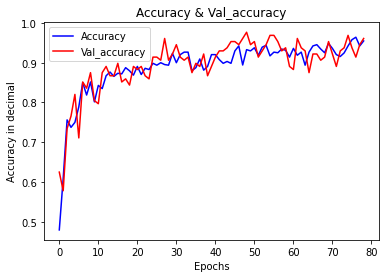

<Figure size 432x288 with 0 Axes>

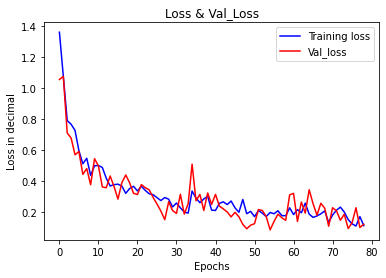

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt    

acc = history.history['accuracy']                                                
val_acc = history.history['val_accuracy']                                         
loss = history.history['loss']                                                    
val_loss = history.history['val_loss']                                            

epochs = range(len(acc))                                                          

plt.plot(acc, 'b', label='Accuracy')                                                 
plt.plot(val_acc, 'r', label='Val_accuracy')                          
plt.title('Accuracy & Val_accuracy')
plt.ylabel('Accuracy in decimal')
plt.xlabel('Epochs')                                      
plt.legend(loc=0)                                                                 
plt.figure()                                                                      
plt.show()

plt.plot(loss, 'b', label='Training loss')
plt.plot(val_loss, 'r', label='Val_loss')
plt.title('Loss & Val_Loss')
plt.ylabel('Loss in decimal')
plt.xlabel('Epochs')  
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
print(train_generator.class_indices)

{'freshapples': 0, 'freshbanana': 1, 'freshlemon': 2, 'freshoranges': 3, 'rottenapples': 4, 'rottenbanana': 5, 'rottenlemon': 6, 'rottenoranges': 7}


### 11. Uji coba model dengan mengupload gambar

In [ ]:
import numpy as np
from google.colab import files
import tensorflow
# from keras.preprocessing import image # this is deprecated, jadi ngga usah digunain lagi
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  if classes[0][0]==1:
    clas='fresh apple'
  elif classes[0][1]==1:
    clas='fresh banana'
  elif classes[0][2]==1:
    clas='fresh lemons'
  elif classes[0][3]==1:
    clas='fresh oranges'
  elif classes[0][4]==1:
    clas='rotten apples'
  elif classes[0][5]==1:
    clas='rotten banana'
  elif classes[0][6]==1:
    clas='rotten lemons'
  elif classes[0][7]==1:
    clas='rotten oranges'
print('{} is a {}'.format(fn,clas))

Saving rotated_by_15_Screen Shot 2018-06-12 at 11.51.47 PM.png to rotated_by_15_Screen Shot 2018-06-12 at 11.51.47 PM (1).png
1/1 [==============================] - 0s 29ms/step
rotated_by_15_Screen Shot 2018-06-12 at 11.51.47 PM.png is a fresh oranges


### 12. Menyimpan model dalam format .tflite

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [ ]:
with tf.io.gfile.GFile("model.tflite", "wb") as f:
  f.write(tflite_model)